In [62]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [63]:
claims=pd.read_csv('claims.csv')
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [64]:
cust_demog=pd.read_csv('cust_demographics.csv')
cust_demog

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [65]:
cust_claim = pd.merge(left=cust_demog,right=claims,left_on="CUST_ID",right_on="customer_id",how = "inner")
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.


In [66]:
cust_claim.describe(include=[np.number])

,CUST_ID,claim_id,customer_id,total_policy_claims
count,1.085000e+03,1.085000e+03,1.085000e+03,1075.000000
mean,5.076790e+07,4.891553e+07,5.076790e+07,1.586977
std,2.849625e+07,2.912818e+07,2.849625e+07,1.146859
min,1.545570e+05,2.683200e+04,1.545570e+05,1.000000
25%,2.645062e+07,2.404606e+07,2.645062e+07,1.000000
50%,4.975949e+07,4.855975e+07,4.975949e+07,1.000000
75%,7.609396e+07,7.404400e+07,7.609396e+07,2.000000
max,9.996199e+07,9.977548e+07,9.996199e+07,8.000000


In [67]:
cust_claim.describe(exclude=[np.number])

,gender,DateOfBirth,State,Contact,Segment,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent
count,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1020,1085
unique,2,1078,50,1078,3,5,100,2,3,3,676,2
top,Male,02-Oct-89,NY,914-342-8239,Gold,Other causes,04/04/2018,Auto,No,Material only,$2320,No
freq,556,2,31,2,375,285,18,970,621,653,7,838


In [68]:
cust_claim.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [69]:
cust_claim["DateOfBirth"] = pd.to_datetime(cust_claim["DateOfBirth"])
cust_claim["claim_date"] = pd.to_datetime(cust_claim["claim_date"])

C:\Users\soura\AppData\Local\Temp\ipykernel_9932\3375200493.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cust_claim["DateOfBirth"] = pd.to_datetime(cust_claim["DateOfBirth"])


In [70]:
cust_claim.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [71]:
cust_claim['claim_amount'] = cust_claim.claim_amount.str.replace('$','').astype('float')

In [72]:
cust_claim.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [73]:
cust_claim['reported_injury_claim'] = ((cust_claim['claim_type'] == 'Injury only') &(cust_claim['police_report'] == 'Yes')).astype(int)

In [74]:
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,reported_injury_claim
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 

#### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [75]:
cust_claim.sort_values(by='claim_date', ascending=False, inplace=True)
cust_claim.drop_duplicates(subset='customer_id', keep='first', inplace=True)
cust_claim.drop('CUST_ID', axis=1, inplace=True)
cust_claim.reset_index(drop=True, inplace=True)
cust_claim

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,reported_injury_claim
0,Male,2067-09-08,ME,134-785-1687,Gold,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
1,Female,1976-05-20,NE,271-123-1475,Gold,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
2,Male,2068-04-22,FL,673-574-7823,Gold,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
3,Male,1977-04-28,MO,962-834-9361,Gold,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
4,Female,1986-03-18,AK,436-934-7156,Silver,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,0
1074,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0
1075,Female,1974-02-14,NM,918-174-7461,Silver,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,0
1076,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [76]:
cust_claim.isnull().sum()

gender                    0
DateOfBirth               0
State                     0
Contact                   0
Segment                   0
claim_id                  0
customer_id               0
incident_cause            0
claim_date                0
claim_area                0
police_report             0
claim_type                0
claim_amount             65
total_policy_claims      10
fraudulent                0
reported_injury_claim     0
dtype: int64

In [77]:
for column in cust_claim.columns:
    if cust_claim[column].dtype == 'float64':
        cust_claim[column].fillna(cust_claim[column].mean(), inplace=True)
        
    elif cust_claim[column].dtype == 'object':
        cust_claim[column].fillna(cust_claim[column].mode()[0], inplace=True)
cust_claim.isnull().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
reported_injury_claim    0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

In [78]:
cust_claim.DateOfBirth = np.where((cust_claim.DateOfBirth > pd.Timestamp.now()), cust_claim.DateOfBirth - pd.DateOffset(years=100), cust_claim.DateOfBirth)
cust_claim['Age'] = [pd.Timestamp.now().year - x.year for x in cust_claim.DateOfBirth]
cust_claim['customer_cat'] = pd.cut(cust_claim.Age, bins=[0,18,30,60,cust_claim.Age.max() ], labels=['Children','Youth','Adult','Senior'])
cust_claim

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,reported_injury_claim,Age,customer_cat
0,Male,1967-09-08,ME,134-785-1687,Gold,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,57,Adult
1,Female,1976-05-20,NE,271-123-1475,Gold,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0,48,Adult
2,Male,1968-04-22,FL,673-574-7823,Gold,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,56,Adult
3,Male,1977-04-28,MO,962-834-9361,Gold,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,47,Adult
4,Female,1986-03-18,AK,436-934-7156,Silver,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,0,38,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.000000,1.0,No,0,25,Youth
1074,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,0,31,Adult
1075,Female,1974-02-14,NM,918-174-7461,Silver,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,0,50,Adult
1076,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,0,39,Adult


In [79]:
cust_claim.groupby(by = "customer_cat").count().reset_index().iloc[:,0:2]

,customer_cat,gender
0,Children,0
1,Youth,174
2,Adult,802
3,Senior,102


### 8. What is the average amount claimed by the customers from various segments?

In [80]:
cust_claim.groupby('Segment')['claim_amount'].agg(np.mean).round(2)

Segment
Gold        12846.40
Platinum    12371.65
Silver      12267.86
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [81]:
a1=pd.to_datetime("2018-10-01")
b1=a1 - pd.DateOffset(days = 20)
round(cust_claim[(cust_claim.claim_date) <b1].pivot_table(index="incident_cause",values="claim_amount",aggfunc='sum'),2)

,claim_amount
incident_cause,
Crime,721938.63
Driver error,3315850.72
Natural causes,1312987.04
Other causes,3723151.80
Other driver error,3277536.45


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [82]:
cust_claim[(cust_claim.State.isin(['TX','DE','AK'])) & (cust_claim.customer_cat == 'Adult') & 
           (cust_claim.incident_cause.str.contains('driver',case=False))].value_counts().count()

27

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart

<function matplotlib.pyplot.show(close=None, block=None)>

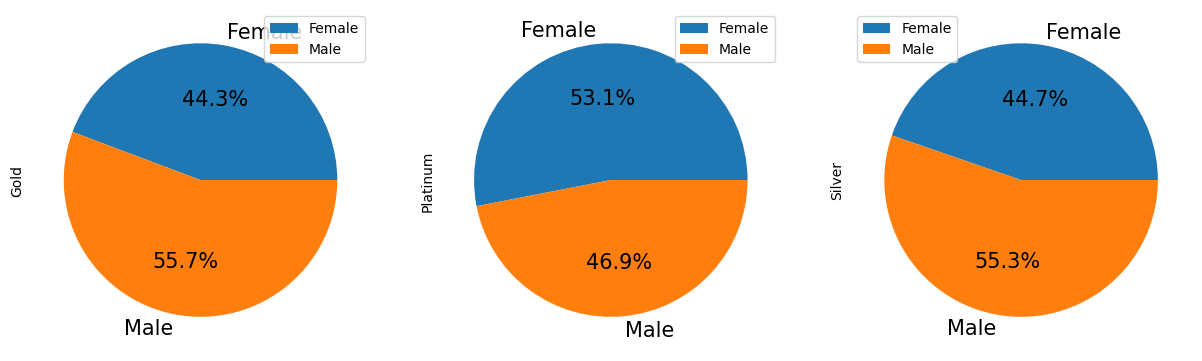

In [83]:
cust_claim.pivot_table(index='gender',columns='Segment',values='claim_amount',aggfunc='sum').plot(kind='pie',subplots=True,figsize=(15,20),fontsize=15,autopct="%1.1f%%")
plt.legend(loc='upper left')
plt.show

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [84]:
a = cust_claim.pivot_table(index='incident_cause', columns='gender', values='claim_amount', aggfunc='sum').T.drop(['Crime', 'Natural causes','Other causes'], axis=1)
a

incident_cause,Driver error,Other driver error
gender,,
Female,1.039850e+06,2.096868e+06
Male,2.554088e+06,1.421324e+06


<Axes: xlabel='gender'>

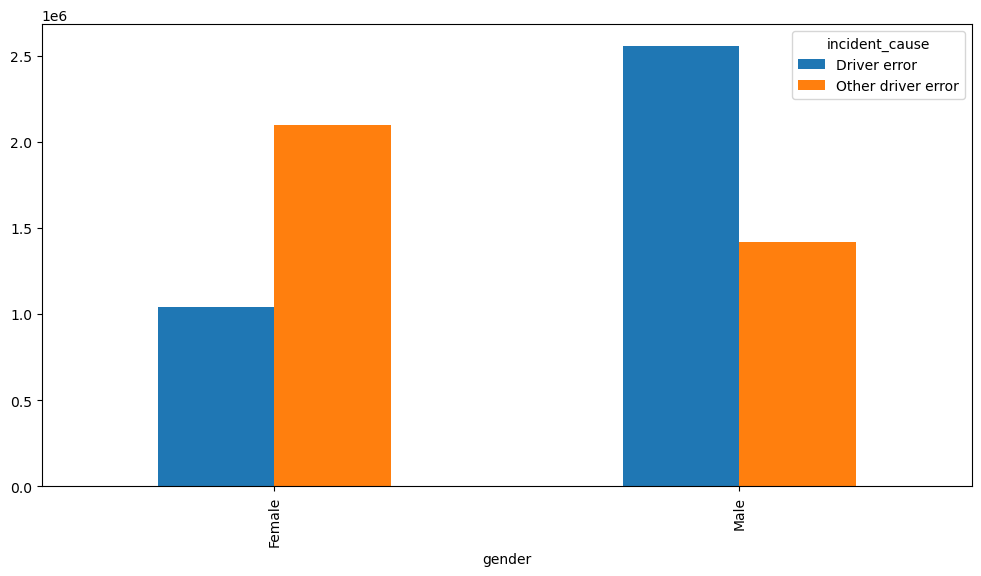

In [85]:
a.plot(kind='bar', figsize=(12,6))

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

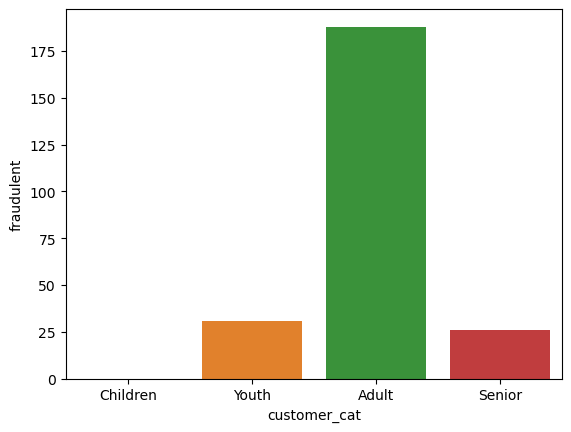

In [86]:
age_grp_fraud=cust_claim[cust_claim.fraudulent=='Yes'].groupby('customer_cat').count()[['fraudulent']].reset_index()
sns.barplot(x='customer_cat',y='fraudulent',data=age_grp_fraud)
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

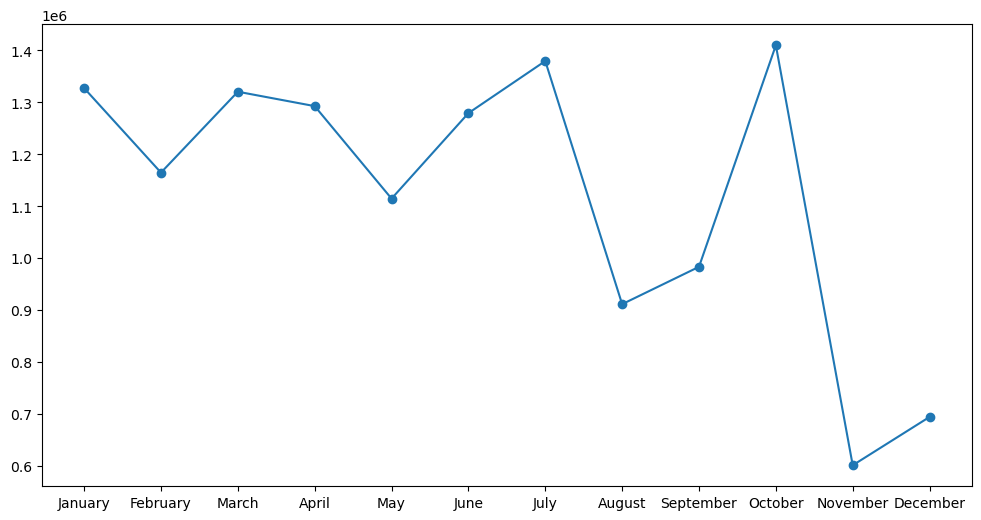

In [87]:
monthly_trend = cust_claim.groupby("claim_date")["claim_amount"].sum().reset_index()
monthly_trend['Monthly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
monthly_trend['Month_No'] = monthly_trend['Monthly'].apply(lambda x:pd.to_datetime(x,format="%B").month)
monthly_trend_data = monthly_trend.groupby(["Monthly","Month_No"])[["claim_amount"]].sum().reset_index().sort_values(by='Month_No')
plt.figure(figsize=(12,6))
plt.plot(monthly_trend_data.Monthly, monthly_trend_data.claim_amount, label = 'Trend Line',marker='o')

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [88]:
cust_fraud = cust_claim[cust_claim.fraudulent=='Yes'].groupby(['gender','customer_cat'])['claim_amount'].mean().reset_index()
cust_non_fraud = cust_claim[cust_claim.fraudulent=='No'].groupby(['gender','customer_cat'])['claim_amount'].mean().reset_index()

Text(0.5, 1.0, 'non-fraudulent claims')

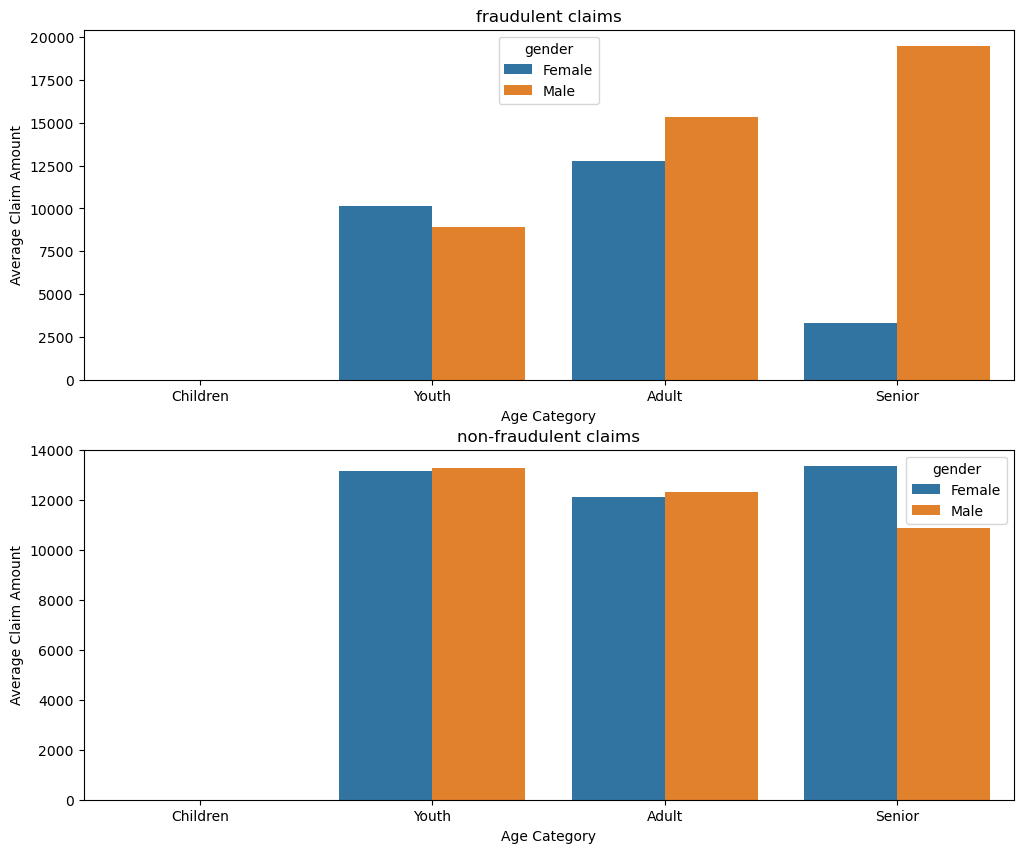

In [89]:
f, axs = plt.subplots(2,1, figsize=(12,10))
sns.barplot(data=cust_fraud, x=cust_fraud.customer_cat, y=cust_fraud.claim_amount, hue=cust_fraud.gender, ax=axs[0])
sns.barplot(data=cust_non_fraud, x=cust_non_fraud.customer_cat, y=cust_non_fraud.claim_amount, hue=cust_fraud.gender, ax=axs[1])
axs[0].set(xlabel='Age Category', ylabel='Average Claim Amount')
axs[0].set_title('fraudulent claims')
axs[1].set(xlabel='Age Category', ylabel='Average Claim Amount')
axs[1].set_title('non-fraudulent claims')

## 16. Is there any similarity in the amount claimed by males and females?

In [90]:
claim_male=cust_claim[cust_claim.gender=='Male']['claim_amount']
claim_male

0       42124.500000
2        2420.000000
3        1830.000000
7       12501.726555
8        2290.000000
            ...     
1067    19120.000000
1068    37290.000000
1069     2967.000000
1071    20310.000000
1076     2080.000000
Name: claim_amount, Length: 551, dtype: float64

In [91]:
claim_female=cust_claim[cust_claim.gender=='Female']['claim_amount']
claim_female

1        1940.000000
4       12501.726555
5       17020.000000
6       26310.000000
9        1860.000000
            ...     
1072     2900.000000
1073    20200.000000
1074    27670.000000
1075    17290.000000
1077    30930.000000
Name: claim_amount, Length: 527, dtype: float64

These are independent samples. Thus , we need to perform the two tail t-test for independed sample

Compute the test statitics

In [92]:
var_stat=stats.ttest_ind(claim_male,claim_female)
var_stat

TtestResult(statistic=0.9625093446632118, pvalue=0.33601006135365463, df=1076.0)

compare the critical value with the test statatics value

In [93]:
p=var_stat.pvalue
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### Outcome : There is similarity in usege of male and female

## 17. Is there any relationship between age category and segment?

In [94]:
observed = pd.crosstab (index=cust_claim.Segment , columns=cust_claim.customer_cat)
observed

customer_cat,Youth,Adult,Senior
Segment,,,
Gold,56,277,38
Platinum,59,268,34
Silver,59,257,30


Segment and age category are two categorical varible. thus , we will perform the chi-square test.

In [95]:
b=stats.chi2_contingency(observed)
b

Chi2ContingencyResult(statistic=0.9130129732295922, pvalue=0.9226865183013125, dof=4, expected_freq=array([[ 59.88311688, 276.01298701,  35.1038961 ],
       [ 58.2690167 , 268.57328386,  34.15769944],
       [ 55.84786642, 257.41372913,  32.73840445]]))

In [96]:
p=b.pvalue
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


###  From the above Chi2 Test we got p-Value= 0.25 which is higher than the decided p-value and this we accept the null hypothesis. We conclude that there is no relationship between Age Category and Segment.

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [97]:
cust_claim_FY17 = cust_claim.loc[(cust_claim.claim_date>=pd.to_datetime('2016-4-1')) & (cust_claim.claim_date<=pd.to_datetime('2017-3-31'))]
cust_claim_FY18 = cust_claim.loc[(cust_claim.claim_date>=pd.to_datetime('2017-4-1')) & (cust_claim.claim_date<=pd.to_datetime('2018-3-31'))]

##### We will be performing a T-Test

In [98]:
c = stats.ttest_1samp(cust_claim_FY18.claim_amount, 10000 )
c

TtestResult(statistic=5.1940537419447885, pvalue=2.8702584225473854e-07, df=569)

In [99]:
p=c.pvalue
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


### Based on the T-Test Result we can observe that the p-value is less than the decided p-value of 0.05. So we reject the Null Hypothesis and we can conclude that the Alternate Hypothesis is true. Thus, we can verify that FY2018 year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average.

## 19. Is there any difference between age groups and insurance claims?

In [100]:
adult_claim = cust_claim.loc[cust_claim.customer_cat == 'Adult', 'claim_amount']
youth_claim = cust_claim.loc[cust_claim.customer_cat == 'Youth', 'claim_amount']
senior_claim = cust_claim.loc[cust_claim.customer_cat == 'Senior', 'claim_amount']

In [101]:
# There are more than two variable. thus , we will perform the ANOVA/f-Test
d = stats.f_oneway( adult_claim, youth_claim, senior_claim)
d

F_onewayResult(statistic=0.5582216619061547, pvalue=0.5723915514064385)

In [102]:
p=d.pvalue
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### so we accept the null hypothesis that There are no differences among Age group and Insurance Claims.

## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [103]:
cust_claim.total_policy_claims

0       1.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
1073    1.0
1074    1.0
1075    1.0
1076    1.0
1077    1.0
Name: total_policy_claims, Length: 1078, dtype: float64

In [104]:
cust_claim.claim_amount

0       42124.500000
1        1940.000000
2        2420.000000
3        1830.000000
4       12501.726555
            ...     
1073    20200.000000
1074    27670.000000
1075    17290.000000
1076     2080.000000
1077    30930.000000
Name: claim_amount, Length: 1078, dtype: float64

In [105]:
result = stats.pearsonr(cust_claim.total_policy_claims,cust_claim.claim_amount)
print(result)

PearsonRResult(statistic=-0.021909487420303752, pvalue=0.47238499876411366)


In [106]:
p=result.pvalue
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### Based on ANOVA Test results we can observe that the p-Value is higher than the decided p-Value of 0.05. So we accept the null hypothesis. Thus, we can say that there is no difference in average claim amount for total number of claims and hence there is no relationship.

###### sourabhasekharrour@gmail.com